In [1]:
# libs
import pandas as pd

In [2]:
clients = pd.read_csv("data/portfolio_clientes.csv")
clients

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
0,094aaed740bbd7fcddb6c678c18d883a,PJ,Caucaia,CE,Alimentação Rápida,Alimentação
1,eaade7915611fcdcbba747e3a83365c6,PF,Cidade Ocidental,GO,Lojas Diversas,Varejo
2,1f21958fd296f1b04a1f0c2658913856,MEI,Manaus,AM,Alimentação Rápida,Alimentação
3,fcdfe15db4520db1a1fe8b6a72878655,MEI,São Bernardo do Campo,SP,Alimentação Rápida,Alimentação
4,ba57e8837452b5e0114d7e273de039b4,PJ,Foz do Iguaçu,PR,Lojas Diversas,Supermercado/Farmácia
...,...,...,...,...,...,...
14400,bfed2a37a79957ea53cf1b70d467e4f1,PJ,Bage,RS,Outros,Serviços
14401,fbcba6437b248dfce69ac494b4c266f1,MEI,Osasco,SP,Automotivo,Bens duráveis
14402,29b16c64a0d582d0162c8346bcbab1b0,PJ,São Carlos,SP,Alimentação Rápida,Alimentação
14403,2ba5b641cad668157ede5a32fe1f3b00,MEI,Imbituba,SC,Educação,Serviços recorrentes


A base deveria possuir apenas um registro por `nr_documento`, porém quando verificamos essa coluna, vemos que existem duplicados na mesma. Como no momento não sei como tratar esse caso, irei considerar apenas um cliente para os casos duplicados.

In [3]:
# total de clientes
clients_wo_duplicate = clients.drop_duplicates(["nr_documento"])
clients_wo_duplicate.shape

(14265, 6)

Dessa forma, possuímos um total de 14.265 clientes na base. Como cada cliente pode possuir mais de um contrato, ao analisarmos a tabela `portfolio_geral` vemos que existem 14.756 contratos.

In [4]:
clients.value_counts("tipo_empresa")

tipo_empresa
PJ     7893
MEI    4843
PF     1669
dtype: int64

<AxesSubplot:xlabel='estado'>

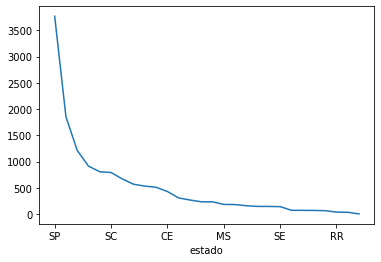

In [5]:
clients.value_counts("estado").plot()

In [6]:
clients.value_counts("segmento")

segmento
Alimentação                 5216
Varejo                      2723
Bens duráveis               2238
Serviços                    2187
Supermercado/Farmácia       1310
Serviços recorrentes         294
Viagens e entretenimento     191
Posto                        167
Outros                        79
dtype: int64

In [7]:
clients.value_counts("subsegmento")

subsegmento
Alimentação Rápida        2959
Lojas Diversas            2710
Outros                    1590
Bares e Restaurantes      1306
Supermercados             1198
Automotivo                1107
Vestuário                 1014
Saúde                      836
Material de Construção     540
Atacadistas Gerais         416
Educação                   193
Postos de Gasolina         166
Academias                  117
Lazer & Turismo            117
None                        86
Atacadista de Alimento      50
dtype: int64

In [8]:
tpv = pd.read_csv("data/portfolio_tpv.csv")

In [9]:
nr_documento_tpv = tpv.drop_duplicates("nr_documento")["nr_documento"].to_list()

In [22]:
tpv.describe().apply(lambda s: s.apply("{0:.5f}".format))

,dt_transacao,qtd_transacoes,vlr_tpv
count,4408597.00000,4408597.00000,4408597.00000
mean,20204274.56190,15.90658,887.49788
std,4656.32206,26.15336,1664.21016
min,20200101.00000,-2.00000,-125000.00000
25%,20200624.00000,3.00000,175.00000
50%,20201030.00000,7.00000,430.00000
75%,20210226.00000,18.00000,978.00000
max,20210630.00000,1245.00000,176880.93000


<AxesSubplot:>

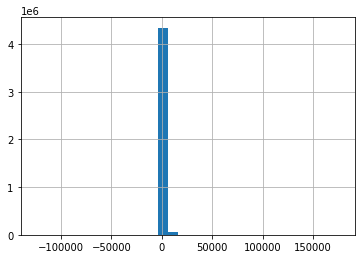

In [25]:
tpv["vlr_tpv"].hist(bins=30)

In [26]:
tpv[tpv["vlr_tpv"] < 0]

,nr_documento,dt_transacao,qtd_transacoes,vlr_tpv
1873,5351768d700e9a6138e860e9858c1ac2,20210206,0,-3450.00
9831,b0871d4e0d72afd1d44381e5b2453cb2,20200315,0,-1251.07
9838,b0871d4e0d72afd1d44381e5b2453cb2,20200423,2,-1659.33
9854,b0871d4e0d72afd1d44381e5b2453cb2,20200528,1,-2104.58
9883,b0871d4e0d72afd1d44381e5b2453cb2,20200801,2,-756.11
...,...,...,...,...
4384324,16ca0a0a166798775201812a467c6a00,20201021,1,-500.00
4384325,16ca0a0a166798775201812a467c6a00,20201115,1,-600.00
4385695,7352e5175bd10698ced797b27e957f16,20210102,0,-28.00
4386394,07c5c7bee28dfda944a97f0299d0a8a5,20201124,1,-844.02


In [33]:
6356.69 + 3450

9806.689999999999

In [10]:
clients[~clients["nr_documento"].isin(nr_documento_tpv)]

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
3824,6ef839f0201c6295072e45a95eb34466,PJ,Tucuruí,PA,Outros,Serviços
4584,e6addfdeb74a038bb5f7149c7cfb1290,PJ,Presidente Epitácio,SP,Outros,Serviços
5989,ec55907309c0e6195675cb786f7d7242,PJ,Americana,SP,Lojas Diversas,Bens duráveis
7414,0a6b34a6b108015777d83b1023d43342,PJ,Serra Talhada,PE,Outros,Serviços
11537,69116fe5b82f759fd2f295f1daa92ecf,PF,São Paulo,SP,Lojas Diversas,Varejo
12479,1eb088b95b56970c880030922dce1c85,PJ,Santa Cruz do Sul,RS,Outros,Bens duráveis


In [11]:
clients[clients["nr_documento"] == "010d8a4b8ee4fac79794a941f60805b5"]

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
6239,010d8a4b8ee4fac79794a941f60805b5,PJ,Joinville,SC,Vestuário,Varejo
12950,010d8a4b8ee4fac79794a941f60805b5,PJ,Joinville,SC,Atacadistas Gerais,Varejo


In [13]:
geral = pd.read_csv("data/portfolio_geral.csv")
geral[geral["nr_documento"] == "010d8a4b8ee4fac79794a941f60805b5"]

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,...,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao
6633,d54e0e78f732e8eca19a0e8bba4096aa,2021-12-26,2020-02,010d8a4b8ee4fac79794a941f60805b5,Settled,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,0.00,416.67,-0.19,0.00,0,0,0
6655,d54e0e78f732e8eca19a0e8bba4096aa,2021-12-23,2020-02,010d8a4b8ee4fac79794a941f60805b5,Settled,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,0.00,416.67,-0.19,0.00,0,0,0
62008,d54e0e78f732e8eca19a0e8bba4096aa,2022-03-17,2020-02,010d8a4b8ee4fac79794a941f60805b5,Settled,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,0.00,416.67,-0.17,0.00,0,0,0
62221,d54e0e78f732e8eca19a0e8bba4096aa,2021-03-16,2020-02,010d8a4b8ee4fac79794a941f60805b5,Settled,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,0.00,416.67,-0.19,0.00,0,0,1
71055,d54e0e78f732e8eca19a0e8bba4096aa,2020-12-23,2020-02,010d8a4b8ee4fac79794a941f60805b5,Settled,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,0.00,416.67,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938398,d54e0e78f732e8eca19a0e8bba4096aa,2022-02-22,2020-02,010d8a4b8ee4fac79794a941f60805b5,Settled,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,0.00,416.67,-0.19,0.00,0,0,0
8001514,d54e0e78f732e8eca19a0e8bba4096aa,2020-07-31,2020-02,010d8a4b8ee4fac79794a941f60805b5,Active,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,1371.63,418.80,54658.10,42671.78,0,0,1
8002466,d54e0e78f732e8eca19a0e8bba4096aa,2021-04-26,2020-02,010d8a4b8ee4fac79794a941f60805b5,Settled,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,0.00,416.67,-0.19,0.00,0,0,1
8002993,d54e0e78f732e8eca19a0e8bba4096aa,2020-08-18,2020-02,010d8a4b8ee4fac79794a941f60805b5,Active,2020-02-22,2020-02-28,2020-11-22,2021-11-22,13.68,...,0.05988,0.00195,0.20568,239.64,418.80,47101.40,36323.13,0,0,1


In [27]:
geral[geral["nr_documento"] == "5351768d700e9a6138e860e9858c1ac2"].value_counts(
    ["contrato_id"]
)

contrato_id                     
b18ac6cff2f309632cb1125510e1be21    530
dtype: int64

In [29]:
to_check = geral[geral["nr_documento"] == "5351768d700e9a6138e860e9858c1ac2"]

In [34]:
to_check[to_check["dt_ref_portfolio"] == "2021-02-06"]

,contrato_id,dt_ref_portfolio,safra,nr_documento,status_contrato,dt_contrato,dt_desembolso,dt_vencimento,dt_wo,prazo,...,juros_mes,juros_diario,perc_retencao,vlr_pgto_realizado,vlr_pgto_esperado,vlr_saldo_devedor,vlr_saldo_devedor_esperado,dsp,dspp,flag_transacao
7099382,b18ac6cff2f309632cb1125510e1be21,2021-02-06,2020-11,5351768d700e9a6138e860e9858c1ac2,Active,2020-11-03,2020-11-05,2022-02-03,2023-02-03,25.65,...,0.07188,0.00233,0.06,0.0,90.6,6369.01,23497.89,1,1,0


In [18]:
to_check.sort_values(["dt_ref_portfolio"])["vlr_pgto_realizado"].to_list()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1185.06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1185.06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [ ]:
geral[["contrato_id"]].drop_duplicates()

,contrato_id
0,356c02706c8e74b15004bb5964ade6bb
1,1eb0e13f83f336146227ccc9efb08c47
2,8b03675f597974ca96f06648e96af6d4
3,4207c25cdd13aba5a05ae348e889d798
4,7dfdca96b6ff0dd844e5e130aee88b30
...,...
503431,9f2a9fc9a042234cf91c509a1c3d85cd
503492,168dfe87d28f24c17e51fd81e77a9fcf
517051,c5240a7f752184298710c9de0153fbe7
519187,6f5e4deb2338f9aa3cc6995f4a42ce8a
